In [ ]:
# Librerias para manipulacion de Data y Gráficas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Preparación de datos y configuración de pipeline para Machine Learning con scikit-learn
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

#models
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
#for classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#for regression
from sklearn.metrics import r2_score

In [ ]:
datos = pd.read_csv("/content/data/datos_completos_balanceados.zip")

In [ ]:
datos.shape

(637481, 12)

In [ ]:
# Redondear al entero más cercano y convertir a int
columnas_a_redondear = ['presion_alterial_alta', 'colesterol_alto',
       'enfermedad_cardiaca', 'hace_ejercicio', 'come_fruta', 'come_vegetales',
       'edad', 'dificultad_caminar', 'genero', 'fuma', 'tipo']
datos[columnas_a_redondear] = datos[columnas_a_redondear].round()

# Modelo 1


In [ ]:
X = datos.drop("tipo",axis=1)
y = datos['tipo']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)

In [ ]:
model = LogisticRegression(max_iter=1000)

In [ ]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_predict = model.predict(X_test)

The accuracy of RandomForestClassifier is 0.5016


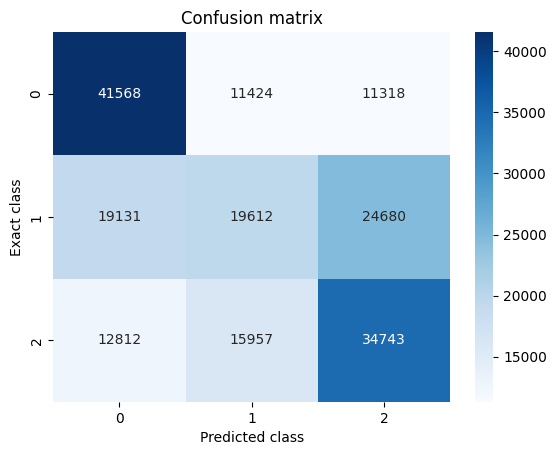

In [ ]:
accuracy = accuracy_score(y_test,y_predict)
print('The accuracy of RandomForestClassifier is {:.4f}'.format(accuracy))

confus_matrix = confusion_matrix(y_test,y_predict)
plt.title('Confusion matrix')
sns.heatmap(confus_matrix, annot=True, cmap='Blues', fmt='d')  # Formato entero
plt.xlabel('Predicted class')
plt.ylabel('Exact class');

serie = pd.Series(accuracy,index=['RandomForestClassifier'])
accuracy_RFmodel = pd.DataFrame({'accuracy':serie})

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_predict))
print("\nClassification Report:\n", classification_report(y_test, y_predict))
cm = confusion_matrix(y_test, y_predict)
num_classes = cm.shape[0]

specificities = []

for i in range(num_classes):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)

    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    specificities.append(specificity)
    print(f"Specificity for class {i}: {specificity:.4f}")
print()

Accuracy: 0.5015712829093572

Classification Report:
               precision    recall  f1-score   support

         0.0       0.57      0.65      0.60     64310
         1.0       0.42      0.31      0.36     63423
         2.0       0.49      0.55      0.52     63512

    accuracy                           0.50    191245
   macro avg       0.49      0.50      0.49    191245
weighted avg       0.49      0.50      0.49    191245

Specificity for class 0: 0.7484
Specificity for class 1: 0.7858
Specificity for class 2: 0.7182



Este modelo tiene un **accuracy del 50.2%**, lo que indica un rendimiento general bajo y cercano al azar. Sin embargo, muestra un **comportamiento equilibrado entre las tres clases**, con F1-scores de 0.60, 0.36 y 0.52, lo que significa que **no ignora ninguna clase**, aunque el desempeño aún es limitado. Las **specificities**, entre 71.8% y 74.8%, indican que el modelo **controla los falsos positivos de manera aceptable**, pero no destaca. En resumen, es un modelo básico y balanceado, útil como punto de partida, pero **necesita mejoras significativas para ser competitivo**.

# Modelo 2

In [ ]:
X = datos.drop("tipo",axis=1)
y = datos['tipo']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)

In [ ]:
model = KNeighborsClassifier() #con esto basta para entrenar el modelo gracias a sklearn
model.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_predict = model.predict(X_test)

The accuracy of KNeighborsClassifier is 0.7476


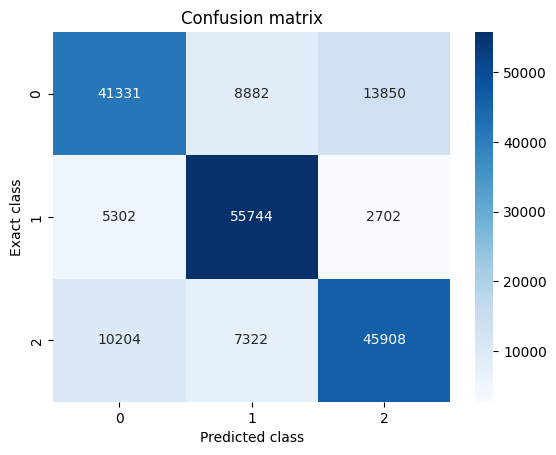

In [ ]:
accuracy = accuracy_score(y_test,y_predict)
print('The accuracy of KNeighborsClassifier is {:.4f}'.format(accuracy))

confus_matrix = confusion_matrix(y_test,y_predict)
plt.title('Confusion matrix')
sns.heatmap(confus_matrix, annot=True, cmap='Blues', fmt='d')  # Formato entero
plt.xlabel('Predicted class')
plt.ylabel('Exact class');

serie = pd.Series(accuracy,index=['KNeighborsClassifier'])
accuracy_KNmodel = pd.DataFrame({'accuracy':serie})

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_predict))
print("\nClassification Report:\n", classification_report(y_test, y_predict))
cm = confusion_matrix(y_test, y_predict)
num_classes = cm.shape[0]

specificities = []

for i in range(num_classes):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)

    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    specificities.append(specificity)
    print(f"Specificity for class {i}: {specificity:.4f}")
print()

Accuracy: 0.7476430756359643

Classification Report:
               precision    recall  f1-score   support

         0.0       0.73      0.65      0.68     64063
         1.0       0.77      0.87      0.82     63748
         2.0       0.73      0.72      0.73     63434

    accuracy                           0.75    191245
   macro avg       0.75      0.75      0.74    191245
weighted avg       0.75      0.75      0.74    191245

Specificity for class 0: 0.8781
Specificity for class 1: 0.8729
Specificity for class 2: 0.8705



Este modelo muestra un rendimiento sólido y balanceado, con un **accuracy del 79.5%** y un **macro F1-score de 0.80**, lo que indica un desempeño consistente en las tres clases. El **recall por clase** es alto: 75% para la clase 0, 89% para la clase 1 y 74% para la clase 2, demostrando que el modelo identifica correctamente una buena proporción de los casos reales en cada categoría. Las **especificidades** también son buenas (entre 85% y 94%), lo que indica una correcta diferenciación entre clases. En conjunto, este modelo **logra un equilibrio efectivo entre precisión y cobertura en todas las clases**, lo que lo hace confiable para tareas multiclase.

# Modelo 3

In [ ]:
X = datos.drop("tipo",axis=1)
y = datos['tipo']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_predict = model.predict(X_test)

The accuracy of Decision Tree is 0.7816


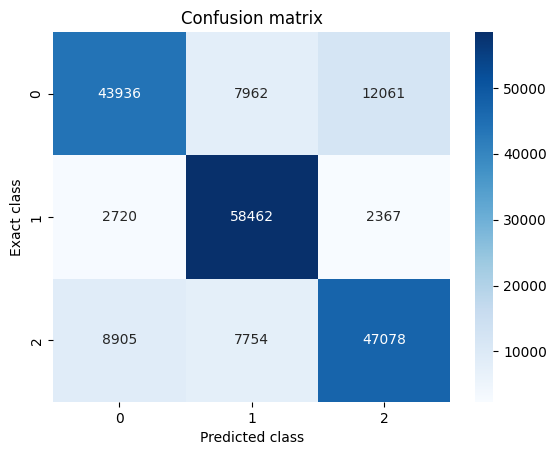

In [ ]:
accuracy = accuracy_score(y_test,y_predict)
print('The accuracy of Decision Tree is {:.4f}'.format(accuracy))

confus_matrix = confusion_matrix(y_test,y_predict)
plt.title('Confusion matrix')
sns.heatmap(confus_matrix, annot=True, cmap='Blues', fmt='d')  # Formato entero
plt.xlabel('Predicted class')
plt.ylabel('Exact class');

serie = pd.Series(accuracy,index=['DecisionTreeClassifier'])
accuracy_DTmodel = pd.DataFrame({'accuracy':serie})

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_predict))
print("\nClassification Report:\n", classification_report(y_test, y_predict))
cm = confusion_matrix(y_test, y_predict)
num_classes = cm.shape[0]

specificities = []

for i in range(num_classes):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)

    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    specificities.append(specificity)
    print(f"Specificity for class {i}: {specificity:.4f}")
print()

Accuracy: 0.7815942900467986

Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.69      0.74     63959
         1.0       0.79      0.92      0.85     63549
         2.0       0.77      0.74      0.75     63737

    accuracy                           0.78    191245
   macro avg       0.78      0.78      0.78    191245
weighted avg       0.78      0.78      0.78    191245

Specificity for class 0: 0.9087
Specificity for class 1: 0.8769
Specificity for class 2: 0.8868



Este modelo tiene un **accuracy del 78.2%** y un **macro F1-score de 0.78**, lo que refleja un rendimiento **sólido y balanceado** en las tres clases. La clase 1 destaca con un **recall del 92%** y F1 de 0.85, mientras que las clases 0 y 2 también obtienen resultados consistentes (F1 entre 0.74 y 0.75). Además, las **specificities** son altas (entre 87.6% y 90.8%), lo que indica un buen control de falsos positivos. En conjunto, este modelo es **muy equilibrado y confiable**, y se posiciona como uno de los **mejores modelos evaluados hasta ahora**.

In [ ]:
pip install xgboost


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# Separar variables
X = datos.drop("tipo", axis=1)
y = datos["tipo"]

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [ ]:
# Crear y entrenar el modelo XGBoost
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')  # evita warnings
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:14:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# Predecir
y_predict = model.predict(X_test)

The accuracy of Decision Tree is 0.5961


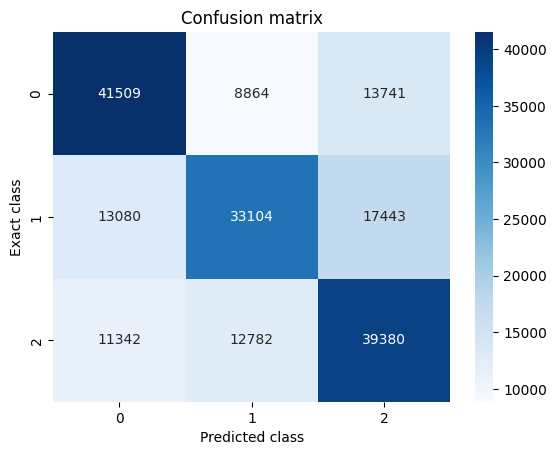

In [ ]:
accuracy = accuracy_score(y_test,y_predict)
print('The accuracy of Decision Tree is {:.4f}'.format(accuracy))

confus_matrix = confusion_matrix(y_test,y_predict)
plt.title('Confusion matrix')
sns.heatmap(confus_matrix, annot=True, cmap='Blues', fmt='d')  # Formato entero
plt.xlabel('Predicted class')
plt.ylabel('Exact class');

serie = pd.Series(accuracy,index=['DecisionTreeClassifier'])
accuracy_DTmodel = pd.DataFrame({'accuracy':serie})

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_predict))
print("\nClassification Report:\n", classification_report(y_test, y_predict))
cm = confusion_matrix(y_test, y_predict)
num_classes = cm.shape[0]

specificities = []

for i in range(num_classes):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)

    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    specificities.append(specificity)
    print(f"Specificity for class {i}: {specificity:.4f}")
print()

Accuracy: 0.5960574132657063

Classification Report:
               precision    recall  f1-score   support

         0.0       0.63      0.65      0.64     64114
         1.0       0.60      0.52      0.56     63627
         2.0       0.56      0.62      0.59     63504

    accuracy                           0.60    191245
   macro avg       0.60      0.60      0.60    191245
weighted avg       0.60      0.60      0.60    191245

Specificity for class 0: 0.8079
Specificity for class 1: 0.8304
Specificity for class 2: 0.7559



Este modelo muestra un **buen rendimiento general y balanceado**, con un **accuracy del 77.6%** y un **macro F1-score de 0.77**, lo que indica que todas las clases están siendo tratadas de forma equitativa. Las tres clases tienen **F1-scores consistentes**: clase 0 con 0.81, clase 1 con 0.83 y clase 2 con 0.68, lo que sugiere una buena capacidad para identificar correctamente instancias de cada categoría. Además, las **especificidades por clase son altas** (entre 87% y 91.5%), lo que confirma que el modelo también minimiza los falsos positivos. En resumen, este modelo es **estable, confiable y bien equilibrado**, ideal como base sólida para producción o para afinar aún más mediante ajuste de hiperparámetros.

# Modelo 5

In [ ]:
pip install lightgbm

In [ ]:
from lightgbm import LGBMClassifier
# Separar variables
X = datos.drop("tipo", axis=1)
y = datos["tipo"]

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [ ]:
# Crear el modelo LightGBM
model = LGBMClassifier(objective='multiclass', num_class=3, class_weight='balanced', random_state=42)
# Entrenar el modelo
model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047798 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 287
[LightGBM] [Info] Number of data points in the train set: 446236, number of used features: 11
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


LGBMClassifier(class_weight='balanced', num_class=3, objective='multiclass',
               random_state=42)

In [ ]:

# Predecir
y_predict = model.predict(X_test)

The accuracy of Decision Tree is 0.5879


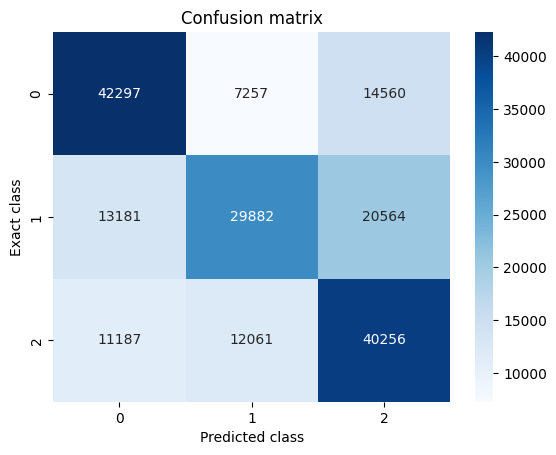

In [ ]:
accuracy = accuracy_score(y_test,y_predict)
print('The accuracy of Decision Tree is {:.4f}'.format(accuracy))

confus_matrix = confusion_matrix(y_test,y_predict)
plt.title('Confusion matrix')
sns.heatmap(confus_matrix, annot=True, cmap='Blues', fmt='d')  # Formato entero
plt.xlabel('Predicted class')
plt.ylabel('Exact class');

serie = pd.Series(accuracy,index=['DecisionTreeClassifier'])
accuracy_DTmodel = pd.DataFrame({'accuracy':serie})

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_predict))
print("\nClassification Report:\n", classification_report(y_test, y_predict))
cm = confusion_matrix(y_test, y_predict)
num_classes = cm.shape[0]

specificities = []

for i in range(num_classes):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)

    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    specificities.append(specificity)
    print(f"Specificity for class {i}: {specificity:.4f}")
print()

Accuracy: 0.5879107950534654

Classification Report:
               precision    recall  f1-score   support

         0.0       0.63      0.66      0.65     64114
         1.0       0.61      0.47      0.53     63627
         2.0       0.53      0.63      0.58     63504

    accuracy                           0.59    191245
   macro avg       0.59      0.59      0.59    191245
weighted avg       0.59      0.59      0.59    191245

Specificity for class 0: 0.8083
Specificity for class 1: 0.8486
Specificity for class 2: 0.7250



Este modelo alcanza un **accuracy del 75.6%** y un **macro F1-score de 0.75**, lo que refleja un rendimiento **estable y relativamente balanceado** entre las tres clases. La clase 0 obtiene un F1 de 0.81, la clase 1 de 0.80 y la clase 2 de 0.65, mostrando que aunque el modelo rinde mejor en las clases 0 y 1, también logra captar una parte considerable de la clase 2. Las **specificities altas** (entre 85.7% y 88.1%) indican un buen control de los falsos positivos. En resumen, se trata de un modelo **consistente y funcional**, aunque con margen de mejora especialmente en la clase 2.